In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# https://networkx.org/documentation/stable/reference/drawing.html

G = nx.read_adjlist('./soc-dolphins/soc-dolphins.mtx', comments='%')

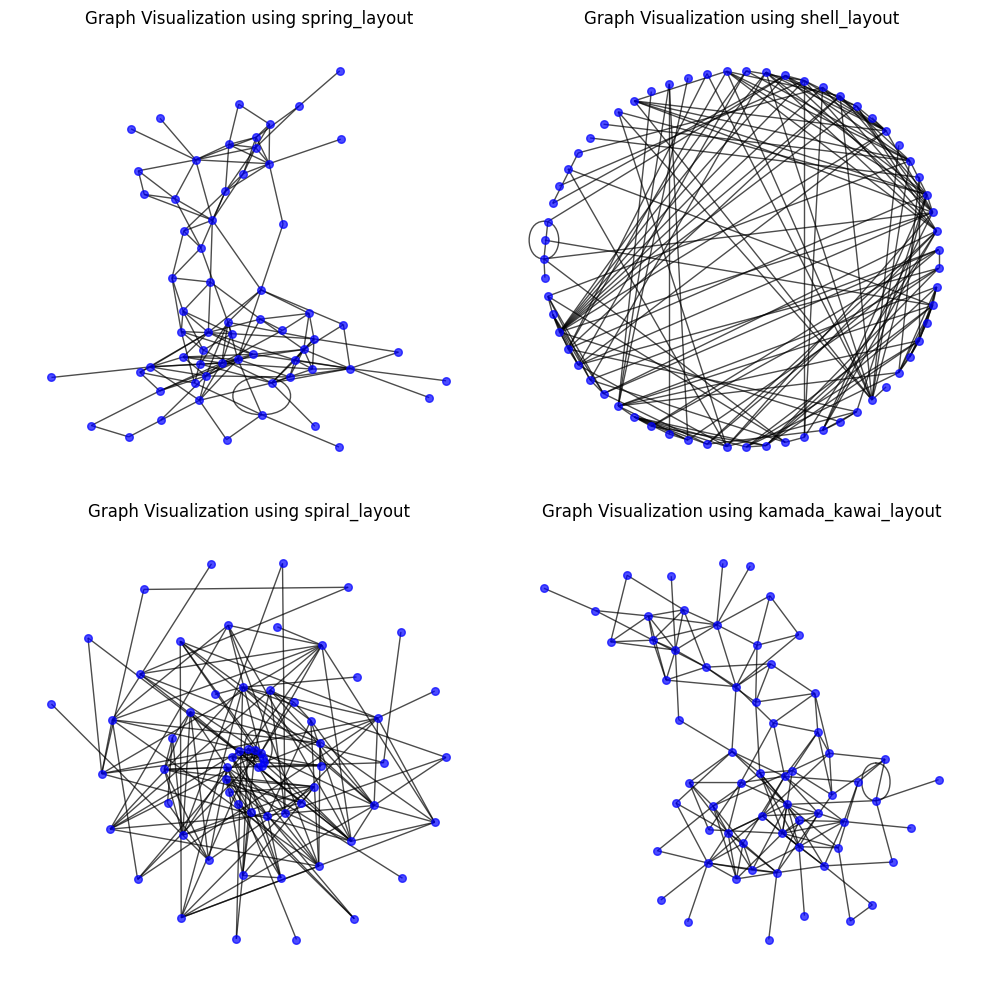

In [40]:
# Task 1: Visualize the graph using 4 different layouts
layouts = [nx.spring_layout, nx.shell_layout, nx.spiral_layout, nx.kamada_kawai_layout]
titles = [layout.__name__ for layout in layouts]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax, layout, title in zip(axs.flatten(), layouts, titles):
    pos = layout(G)
    nx.draw(G, pos, with_labels=False, node_size=30, node_color='blue', alpha=0.7, ax=ax)
    ax.set_title(f"Graph Visualization using {title}")

plt.tight_layout()
plt.show()

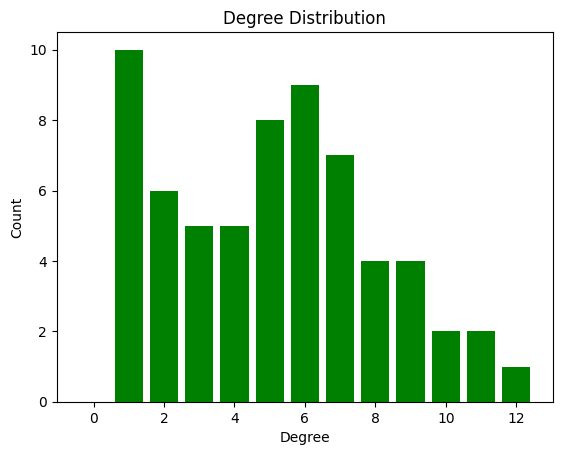

In [41]:
# Task 2: Calculate the Degree Distribution
degrees = [degree for node, degree in G.degree()]
degree_counts = np.bincount(degrees)
plt.bar(range(len(degree_counts)), degree_counts, width=0.8, color='g')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

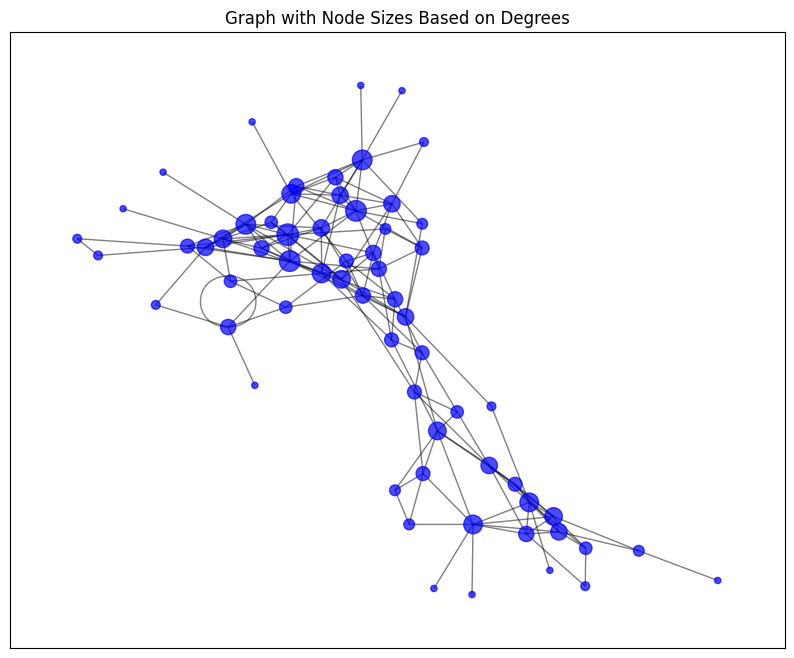

In [36]:
# Calculate node sizes based on their degrees
node_sizes = [20 * degree for node, degree in G.degree()]

# Visualize the nodes with their assigned sizes
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Graph with Node Sizes Based on Degrees')
plt.show()


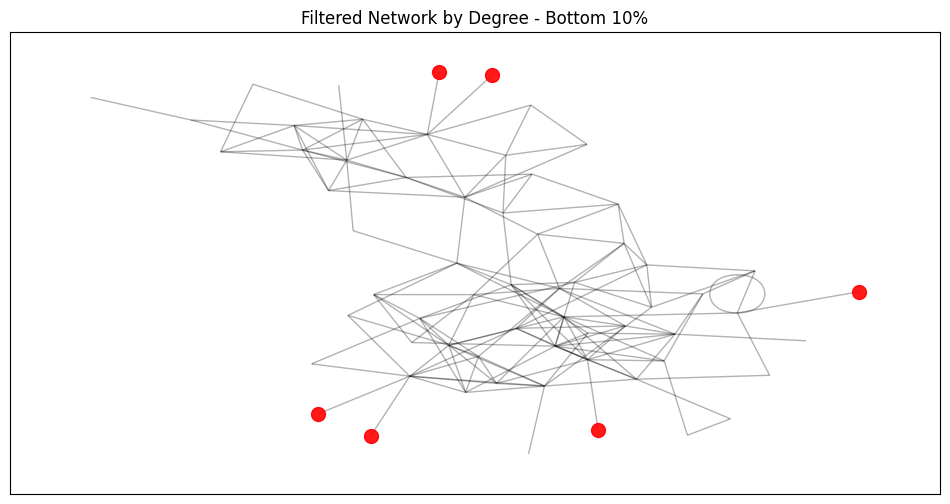

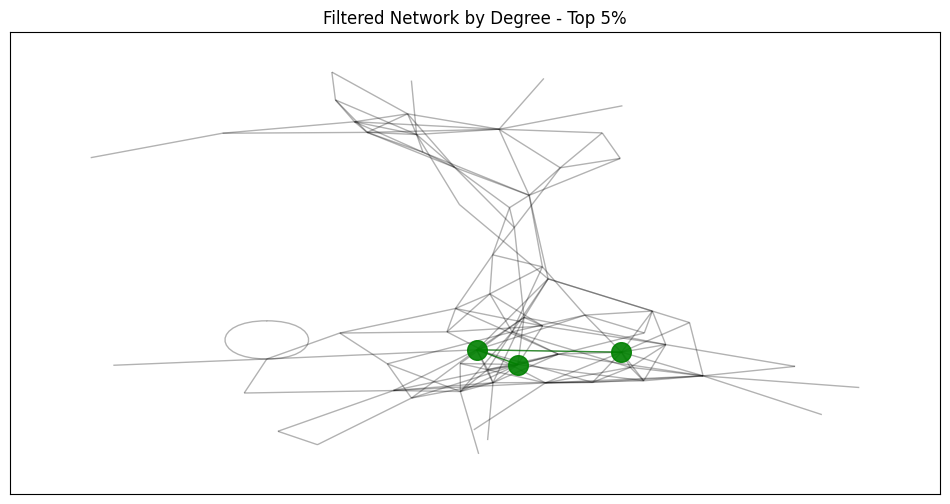

In [44]:
# Task 3: Filter the network by degree
sorted_nodes = sorted(G.nodes(), key=lambda x: G.degree(x))
bottom_10_percent = int(0.1 * len(sorted_nodes))
top_5_percent = int(0.05 * len(sorted_nodes))
filtered_nodes_bottom = sorted_nodes[:bottom_10_percent]
filtered_nodes_top = sorted_nodes[-top_5_percent:]

subgraph_bottom = G.subgraph(filtered_nodes_bottom)
subgraph_top = G.subgraph(filtered_nodes_top)

# Filtered Network by Degree - Bottom 10%
plt.figure(figsize=(12, 6))
pos = nx.kamada_kawai_layout(G)
edges = G.edges()
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.3)
nx.draw_networkx_edges(subgraph_bottom, pos, edge_color='red', alpha=0.7)
nx.draw_networkx_nodes(subgraph_bottom, pos, node_size=100, node_color='red', alpha=0.9)
plt.title('Filtered Network by Degree - Bottom 10%')
plt.show()

# Filtered Network by Degree - Top 5%
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G)
edges = G.edges()
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.3)
nx.draw_networkx_edges(subgraph_top, pos, edge_color='green', alpha=0.7)
nx.draw_networkx_nodes(subgraph_top, pos, node_size=200, node_color='green', alpha=0.9)
plt.title('Filtered Network by Degree - Top 5%')
plt.show()


In [29]:
# Task 4: Find connected components and the size of the giant component
connected_components = list(nx.connected_components(G))
giant_component = max(connected_components, key=len)
giant_component_size = len(giant_component)

print(f"Number of connected components: {len(connected_components)}")
print(f"Size of the giant component: {giant_component_size}")

Number of connected components: 1
Size of the giant component: 63
